In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, diff, exp, ln, simplify, lambdify, solveset, Eq

In [3]:
# Aufgabe 1:

data = np.genfromtxt('./Vesuch1Daten/aufgabe1/messung10.csv', delimiter=';', skip_header=2, dtype=str)
print(data)

data = data[1000:20000, 1]
toFloat = []
for x in data:
    toFloat.append(float(x.replace(",", ".")))
data = np.array(toFloat)

mittelwert = np.mean(data)
standartabweichung = np.std(data)
print(mittelwert, standartabweichung)

[['-5,00011165' '1,30505700']
 ['-5,00000765' '1,30505700']
 ['-4,99990365' '1,35165500']
 ...
 ['5,00000781' '1,35165500']
 ['5,00011181' '1,30505700']
 ['5,00021581' '1,30505700']]
1.3117818164736843 0.017825265475541457


In [3]:
mittelwerte = []
zentimeter = []
for i in range(10, 52, 2):
    zentimeter.append(i)
    cur_data = np.genfromtxt(f"./Vesuch1Daten/aufgabe1/messung{i}.csv", delimiter=';', skip_header=2, dtype=str)
    cur_data = cur_data[1000:20000, 1]
    toFloat = []
    for x in cur_data:
        toFloat.append(float(x.replace(",", ".")))
    cur_data = np.array(toFloat)
    
    mittelwert = np.mean(cur_data)
    mittelwerte.append(mittelwert)

mittelwerte = np.array(mittelwerte)
zentimeter = np.array(zentimeter)
print(mittelwerte)
print(zentimeter)

[1.31178182 1.2039555  1.12628507 1.05239743 0.9754193  0.89500559
 0.83885233 0.79555525 0.74017216 0.71724584 0.67871894 0.65504459
 0.62137126 0.60203791 0.58167197 0.56166008 0.54548803 0.52072862
 0.50396033 0.48012806 0.48107971]
[10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50]


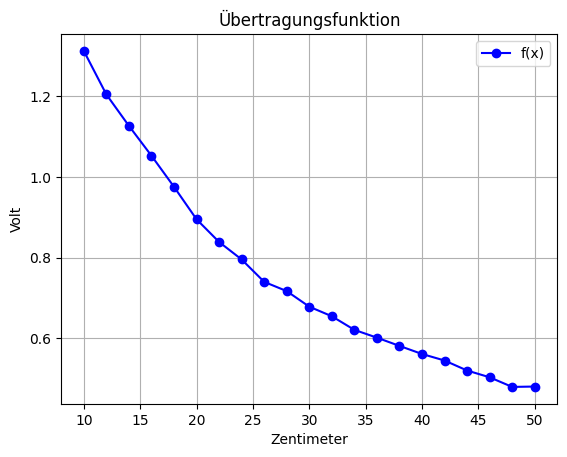

In [4]:
plt.plot(zentimeter, mittelwerte, marker='o', linestyle='-', color='b', label = "f(x)") 
plt.title("Übertragungsfunktion")
plt.xlabel("Zentimeter")
plt.ylabel("Volt")
plt.grid()

plt.legend()
plt.show()

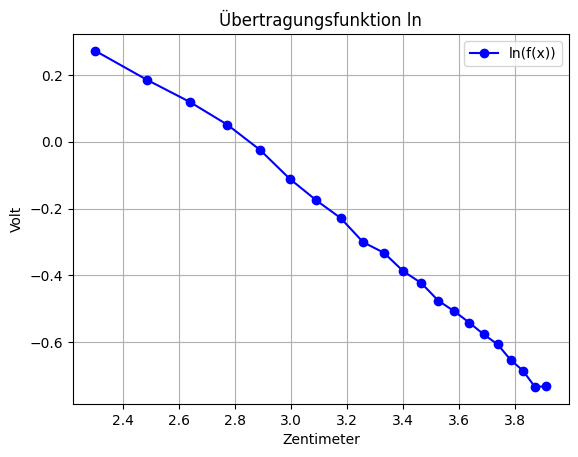

In [5]:
# Aufgabe 2:

mittelwerte_ln = np.log(mittelwerte)
zentimeter_ln = np.log(zentimeter)

plt.plot(zentimeter_ln, mittelwerte_ln, marker='o', linestyle='-', color='b', label = "ln(f(x))") 
plt.title("Übertragungsfunktion ln")
plt.xlabel("Zentimeter")
plt.ylabel("Volt")
plt.grid()

plt.legend()
plt.show()


In [6]:
n = len(mittelwerte_ln)
x_mean = np.mean(zentimeter_ln)
y_mean = np.mean(mittelwerte_ln)

zaeler = 0.
for i in range(0, n):
    zaeler += (zentimeter_ln[i] - x_mean) * (mittelwerte_ln[i] - y_mean)
nenner = 0.
for i in range(0, n):
    nenner += math.pow(zentimeter_ln[i] - x_mean, 2)

a = zaeler / nenner
b = y_mean - a * x_mean

new_y = np.vectorize(lambda x: a * x + b)(zentimeter_ln)


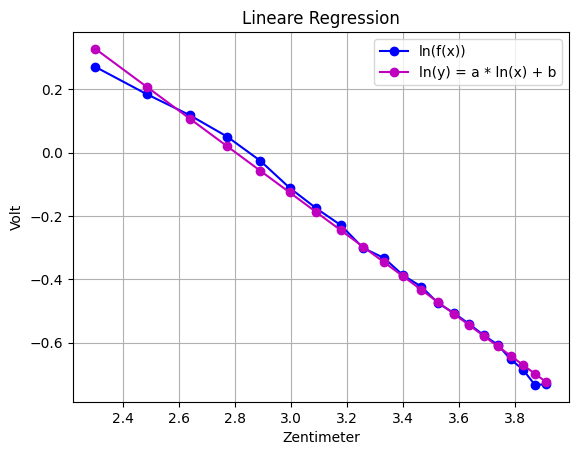

In [7]:
plt.plot(zentimeter_ln, mittelwerte_ln, marker='o', linestyle='-', color='b', label = "ln(f(x))")
plt.plot(zentimeter_ln, new_y, marker='o', linestyle='-', color='m', label = "ln(y) = a * ln(x) + b") 
plt.title("Lineare Regression")
plt.xlabel("Zentimeter")
plt.ylabel("Volt")
plt.grid()

plt.legend()
plt.show()


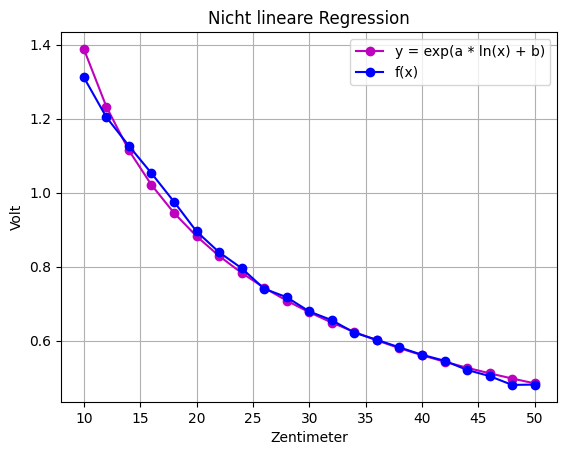

In [82]:
new_y2 = np.vectorize(lambda x: math.exp(a * x + b))(zentimeter_ln)

plt.plot(zentimeter, new_y2, marker='o', linestyle='-', color='m', label = "y = exp(a * ln(x) + b)")
plt.plot(zentimeter, mittelwerte, marker='o', linestyle='-', color='b', label = "f(x)") 
plt.title("Nicht lineare Regression")
plt.xlabel("Zentimeter")
plt.ylabel("Volt")
plt.grid()

plt.legend()
plt.show()

In [9]:
# Aufgabe 3:

data = np.genfromtxt('./Vesuch1Daten/aufgabe3/messungDinA4Lang.csv', delimiter=';', skip_header=2, dtype=str)
data = data[1000:, 1]
toFloat = []
for x in data:
    toFloat.append(float(x.replace(",", ".")))
data = np.array(toFloat)

lang_mean = np.mean(data)
lang_s = np.std(data)
#print(lang_mean, lang_s)

t68 = 1.
t95 = 1.96
vertrauensbereich68 = (round(float(lang_mean - t68 * lang_s), 5), round(float(lang_mean + t68 * lang_s), 5))
vertrauensbereich95 = (round(float(lang_mean - t95 * lang_s), 5), round(float(lang_mean + t95 * lang_s), 5))

print("Messung liegt mit 68.26% Wahrscheinlichkeit im Vertrauensbereich:")
print(vertrauensbereich68)

print("Messung liegt mit 95.% Wahrscheinlichkeit im Vertrauensbereich:")
print(vertrauensbereich95)

Messung liegt mit 68.26% Wahrscheinlichkeit im Vertrauensbereich:
(0.69283, 0.73786)
Messung liegt mit 95.% Wahrscheinlichkeit im Vertrauensbereich:
(0.67122, 0.75947)


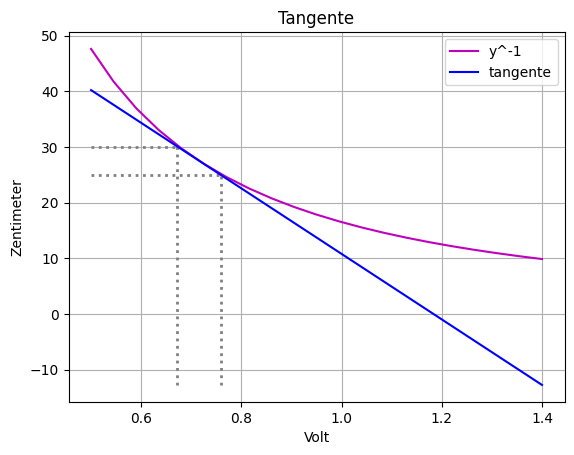

Messung liegt mit 95.% Wahrscheinlichkeit im Vertrauensbereich:
24.95334 (cm), bis 30.14658 (cm)

∆y = f'(x) * ∆x
∆y = 2.5968391811701026


In [86]:
# inverse function volt -> zentimeter
def f(x):
    return math.exp((math.log(x) - b) / a)

x_volts = []

for i in range(500, 1445, 45):
    x_volts.append(i/1000.)

y_zenti = []

for x in x_volts:
    y_zenti.append(f(x))

#------------

x = symbols('x')

f = exp((ln(x) - b) / a)

f_callable = lambdify(x, f, 'numpy')


f_prime = diff(f, x)
f_prime_callable = lambdify(x, f_prime, 'numpy')


def tangente(x):
    return f_prime_callable(lang_mean) * (x - lang_mean) + f_callable(lang_mean)

t_werte = np.vectorize(lambda x: tangente(x))(x_volts)

#----------

vertr95 = (0.67122, 0.75947)
vertr95_cm = (tangente(vertr95[0]), tangente(vertr95[1]))



plt.plot([vertr95[0], vertr95[0]], [tangente(x_volts[-1]), tangente(vertr95[0])], color='gray', linestyle=':', linewidth=2)
plt.plot([vertr95[1], vertr95[1]], [tangente(x_volts[-1]), tangente(vertr95[1])], color='gray', linestyle=':', linewidth=2)

plt.plot([x_volts[0], vertr95[0]], [30, 30], color='gray', linestyle=':', linewidth=2)
plt.plot([x_volts[0], vertr95[1]], [25, 25], color='gray', linestyle=':', linewidth=2)

plt.plot(x_volts, y_zenti, linestyle='-', color='m', label = "y^-1")
plt.plot(x_volts, t_werte, linestyle='-', color='b', label = "tangente")
plt.title("Tangente")
plt.xlabel("Volt")
plt.ylabel("Zentimeter")
plt.grid()

plt.legend()
plt.show()

print("Messung liegt mit 95.% Wahrscheinlichkeit im Vertrauensbereich:")
print(f"{round(vertr95_cm[1], 5)} (cm), bis {round(vertr95_cm[0], 5)} (cm)\n")

print("∆y = f'(x) * ∆x")
delta_x_lang = t95 * lang_s
print(f"∆y = {abs(f_prime_callable(lang_mean) * delta_x_lang)}")

In [105]:
# Aufgabe 3 b

data = np.genfromtxt('./Vesuch1Daten/aufgabe3/messungDinA4Kurz.csv', delimiter=';', skip_header=2, dtype=str)
data = data[1000:, 1]
toFloat = []
for x in data:
    toFloat.append(float(x.replace(",", ".")))
data = np.array(toFloat)

kurz_mean = np.mean(data)
kurz_s = np.std(data)

def flaeche(lang, kurz):
    return lang * kurz

delta_x_kurz = t95 * kurz_s

delta_y_volt = math.sqrt(kurz_mean * delta_x_lang + lang_mean * delta_x_kurz)
delta_y_cm = f_callable(delta_y_volt)

flaeche_cm = f_callable(kurz_mean) * f_callable(lang_mean)

print("y = lang * kurz")
print(f"Fläche Schätzung: {flaeche_cm} (cm)")
print(f"∆y = {round(f_callable(delta_y), 5)}")

print("Messung liegt mit 95.% Wahrscheinlichkeit im Vertrauensbereich:")
print(f"{round(flaeche_cm - delta_y_cm, 5)} (cm), bis {round(flaeche_cm + delta_y_cm, 5)} (cm)\n")


y = lang * kurz
Fläche Schätzung: 539.366414371518 (cm)
∆y = 130.60835
Messung liegt mit 95.% Wahrscheinlichkeit im Vertrauensbereich:
408.75807 (cm), bis 669.97476 (cm)

